In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bootstrap, combine_pvalues
import numpy as np

# Function


In [2]:
def agg_by_city_lates(db, nn=False):
    cities_lates = []
    if not nn:
#         tmp = db.groupby(by=['location']).mean(numeric_only=True)[["late", "late_cil", "late_cih",
#                                                   "late_ethno", "late_cil_ethno", "late_cih_ethno",
#                                                   "late_relig", "late_cil_relig", "late_cih_relig",
#                                                   "late_pval", "late_pval_ethno", "late_pval_relig"]]
#         tmp = tmp.join(db.groupby(by=['location']).max()[["late_cih", "late_cih_ethno", "late_cih_relig"]],
#                        rsuffix='_max')
#         tmp = tmp.join(db.groupby(by=['location']).min()[["late_cih", "late_cih_ethno", "late_cih_relig"]],
#                        rsuffix='_min')
        locations = db["location"].unique()
        for city in locations:
            tmp = db[db["location"] == city][["late",
                                              "late_ethno",
                                              "late_relig",
                                              "late_pval",
                                              "late_pval_ethno",
                                              "late_pval_relig",
                                              "late_cil",
                                              "late_cih",
                                              "late_cil_ethno",
                                              "late_cih_ethno",
                                              "late_cil_relig",
                                              "late_cih_relig"]]
            tmp_mean = tmp.mean()
            if (tmp["late"].values == 0).all() or len(tmp['late'].values) < 2:
                res_late = (tmp['late_cil'].mean(), tmp['late_cih'].mean())
            else:
                res_late = bootstrap((tmp["late"].values,), np.mean, confidence_level=0.95, random_state=1)
                res_late = (res_late.confidence_interval.low, res_late.confidence_interval.high)
            
            if (tmp["late_ethno"].values == 0).all() or len(tmp['late_ethno'].values) < 2:
                res_late_ethno = (tmp['late_cil_ethno'].mean(), tmp['late_cih_ethno'].mean())
            else:
                res_late_ethno = bootstrap((tmp["late_ethno"].values,), np.mean, confidence_level=0.95, random_state=1)
                res_late_ethno = (res_late_ethno.confidence_interval.low, res_late_ethno.confidence_interval.high)
            
            if (tmp["late_relig"].values == 0).all() or len(tmp['late_relig'].values) < 2:
                res_late_relig = (tmp['late_cil_relig'].mean(), tmp['late_cih_relig'].mean())
            else:
                res_late_relig = bootstrap((tmp["late_relig"].values,), np.mean, confidence_level=0.95, random_state=1)
                res_late_relig = (res_late_relig.confidence_interval.low, res_late_relig.confidence_interval.high)
            
            late_pval = combine_pvalues(tmp["late_pval"].values)
            late_pval_ethno = combine_pvalues(tmp["late_pval_ethno"].values)
            late_pval_relig = combine_pvalues(tmp["late_pval_relig"].values)

            cities_lates.append({"city": city, 
                                 "late": tmp_mean["late"],
                                 "late_cil": res_late[0],
                                 "late_cih": res_late[1],
                                 "late_ethno": tmp_mean["late_ethno"],
                                 "late_cil_ethno": res_late_ethno[0],
                                 "late_cih_ethno": res_late_ethno[1],
                                 "late_relig": tmp_mean["late_relig"],
                                 "late_cil_relig": res_late_relig[0],
                                 "late_cih_relig": res_late_relig[1],
                                 "late_pval": late_pval[1],
                                 "late_pval_mean": tmp_mean["late_pval"],
                                 "late_pval_ethno": late_pval_ethno[1],
                                 "late_pval_ethno_mean": tmp_mean["late_pval_ethno"],
                                 "late_pval_relig": late_pval_relig[1],
                                 "late_pval_relig_mean": tmp_mean["late_pval_relig"]})

    else: 
#         tmp = db.groupby(by=['location']).mean(numeric_only=True)[["late", "late_cil", "late_cih",
#                                                   "late_neigh", "late_cil_neigh", "late_cih_neigh",
#                                                   "late_pval", "late_pval_neigh"]]
#         tmp = tmp.join(db.groupby(by=['location']).max()[["late_cih", "late_cih_neigh"]],
#                        rsuffix='_max')
#         tmp = tmp.join(db.groupby(by=['location']).min()[["late_cih", "late_cih_neigh"]],
#                        rsuffix='_min')
        locations = db["location"].unique()
        for city in locations:
            tmp = db[db["location"] == city][["late",
                                              "late_neigh",
                                              "late_pval",
                                              "late_pval_neigh",
                                              "late_cil",
                                              "late_cih",
                                              "late_cil_neigh",
                                              "late_cih_neigh"]]
            tmp_mean = tmp.mean()
            if (tmp["late"].values == 0).all() or len(tmp['late'].values) < 2:
                res_late = (tmp['late_cil'].mean(), tmp['late_cih'].mean())
            else:
                res_late = bootstrap((tmp["late"].values,), np.mean, confidence_level=0.95, random_state=1)
                res_late = (res_late.confidence_interval.low, res_late.confidence_interval.high)

            if (tmp["late_neigh"].values == 0).all() or len(tmp['late_neigh'].values) < 2:
                res_late_neigh = (tmp['late_cil_neigh'].mean(), tmp['late_cih_neigh'].mean())
            else:
                res_late_neigh = bootstrap((tmp["late_neigh"].values,), np.mean, confidence_level=0.95, random_state=1)
                res_late_neigh = (res_late_neigh.confidence_interval.low, res_late_neigh.confidence_interval.high)
      
            late_pval = combine_pvalues(tmp["late_pval"].values)
            late_pval_neigh = combine_pvalues(tmp["late_pval_neigh"].values)
    
            cities_lates.append({"city": city, 
                                 "late": tmp_mean["late"],
                                 "late_cil": res_late[0],
                                 "late_cih": res_late[1],
                                 "late_neigh": tmp_mean["late_neigh"],
                                 "late_cil_neigh": res_late_neigh[0],
                                 "late_cih_neigh": res_late_neigh[1],
                                 "late_pval": late_pval[1],
                                 "late_pval_neigh": late_pval_neigh[1]})
    
    return pd.DataFrame(cities_lates).round(decimals=4).set_index('city').sort_index()

# Load LATEs

In [3]:
late_dir = os.path.join('Output', 'lates')

lates_agg_5_a0 = pd.read_pickle(os.path.join(late_dir, 'lates_agg_5_a0.pkl'))
lates_agg_5_a3 = pd.read_pickle(os.path.join(late_dir, 'lates_agg_5_a3.pkl'))
lates_agg_5_a5 = pd.read_pickle(os.path.join(late_dir, 'lates_agg_5_a5.pkl'))
lates_agg_10_a0 = pd.read_pickle(os.path.join(late_dir, 'lates_agg_10_a0.pkl'))
lates_agg_10_a3 = pd.read_pickle(os.path.join(late_dir, 'lates_agg_10_a3.pkl'))
lates_agg_10_a5 = pd.read_pickle(os.path.join(late_dir, 'lates_agg_10_a5.pkl'))
lates_agg_14_a0 = pd.read_pickle(os.path.join(late_dir, 'lates_agg_14_a0.pkl'))
lates_agg_14_a3 = pd.read_pickle(os.path.join(late_dir, 'lates_agg_14_a3.pkl'))
lates_agg_14_a5 = pd.read_pickle(os.path.join(late_dir, 'lates_agg_14_a5.pkl'))

lates_agg_5_a0_nn = pd.read_pickle(os.path.join(late_dir, 'lates_agg_5_a0_nn.pkl'))
lates_agg_5_a3_nn = pd.read_pickle(os.path.join(late_dir, 'lates_agg_5_a3_nn.pkl'))
lates_agg_5_a5_nn = pd.read_pickle(os.path.join(late_dir, 'lates_agg_5_a5_nn.pkl'))
lates_agg_10_a0_nn = pd.read_pickle(os.path.join(late_dir, 'lates_agg_10_a0_nn.pkl'))
lates_agg_10_a3_nn = pd.read_pickle(os.path.join(late_dir, 'lates_agg_10_a3_nn.pkl'))
lates_agg_10_a5_nn = pd.read_pickle(os.path.join(late_dir, 'lates_agg_10_a5_nn.pkl'))
lates_agg_14_a0_nn = pd.read_pickle(os.path.join(late_dir, 'lates_agg_14_a0_nn.pkl'))
lates_agg_14_a3_nn = pd.read_pickle(os.path.join(late_dir, 'lates_agg_14_a3_nn.pkl'))
lates_agg_14_a5_nn = pd.read_pickle(os.path.join(late_dir, 'lates_agg_14_a5_nn.pkl'))

# LATEs Aggregation


In [4]:
lates_cityagg_14_a5 = agg_by_city_lates(lates_agg_14_a5)
lates_cityagg_14_a3 = agg_by_city_lates(lates_agg_14_a3)
lates_cityagg_14_a0 = agg_by_city_lates(lates_agg_14_a0)

lates_cityagg_10_a5 = agg_by_city_lates(lates_agg_10_a5)
lates_cityagg_10_a3 = agg_by_city_lates(lates_agg_10_a3)
lates_cityagg_10_a0 = agg_by_city_lates(lates_agg_10_a0)

lates_cityagg_5_a5 = agg_by_city_lates(lates_agg_5_a5)
lates_cityagg_5_a3 = agg_by_city_lates(lates_agg_5_a3)
lates_cityagg_5_a0 = agg_by_city_lates(lates_agg_5_a0)

lates_city_agg_avg_a0 = agg_by_city_lates(pd.concat([lates_agg_5_a0,
                                                     lates_agg_10_a0,
                                                     lates_agg_14_a0]))
lates_city_agg_avg_a3 = agg_by_city_lates(pd.concat([lates_agg_5_a3,
                                                     lates_agg_10_a3,
                                                     lates_agg_14_a3]))
lates_city_agg_avg_a5 = agg_by_city_lates(pd.concat([lates_agg_5_a5,
                                                     lates_agg_10_a5,
                                                     lates_agg_14_a5]))
                                      
lates_city_agg_avg_all = agg_by_city_lates(pd.concat([lates_agg_5_a0,
                                                      lates_agg_10_a0,
                                                      lates_agg_14_a0,
                                                      lates_agg_5_a3,
                                                      lates_agg_10_a3,
                                                      lates_agg_14_a3,
                                                      lates_agg_5_a5,
                                                      lates_agg_10_a5,
                                                      lates_agg_14_a5]))

lates_cityagg_14_a5_nn = agg_by_city_lates(lates_agg_14_a5_nn, True)
lates_cityagg_14_a3_nn = agg_by_city_lates(lates_agg_14_a3_nn, True)
lates_cityagg_14_a0_nn = agg_by_city_lates(lates_agg_14_a0_nn, True)

lates_cityagg_10_a5_nn = agg_by_city_lates(lates_agg_10_a5_nn, True)
lates_cityagg_10_a3_nn = agg_by_city_lates(lates_agg_10_a3_nn, True)
lates_cityagg_10_a0_nn = agg_by_city_lates(lates_agg_10_a0_nn, True)

lates_cityagg_5_a5_nn = agg_by_city_lates(lates_agg_5_a5_nn, True)
lates_cityagg_5_a3_nn = agg_by_city_lates(lates_agg_5_a3_nn, True)
lates_cityagg_5_a0_nn = agg_by_city_lates(lates_agg_5_a0_nn, True)


graphs_path = os.path.join('Output', 'graphs')
os.makedirs(graphs_path, exist_ok=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\sci

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\sci

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))


# Graphs

## Different Cutoff Dates Comparions for 14-days RD Period, Including Religion/Ethnic Based Hate Crimes

Text(0.5, 1.0, 'Cut-off date that is 5 days prior the pride event')

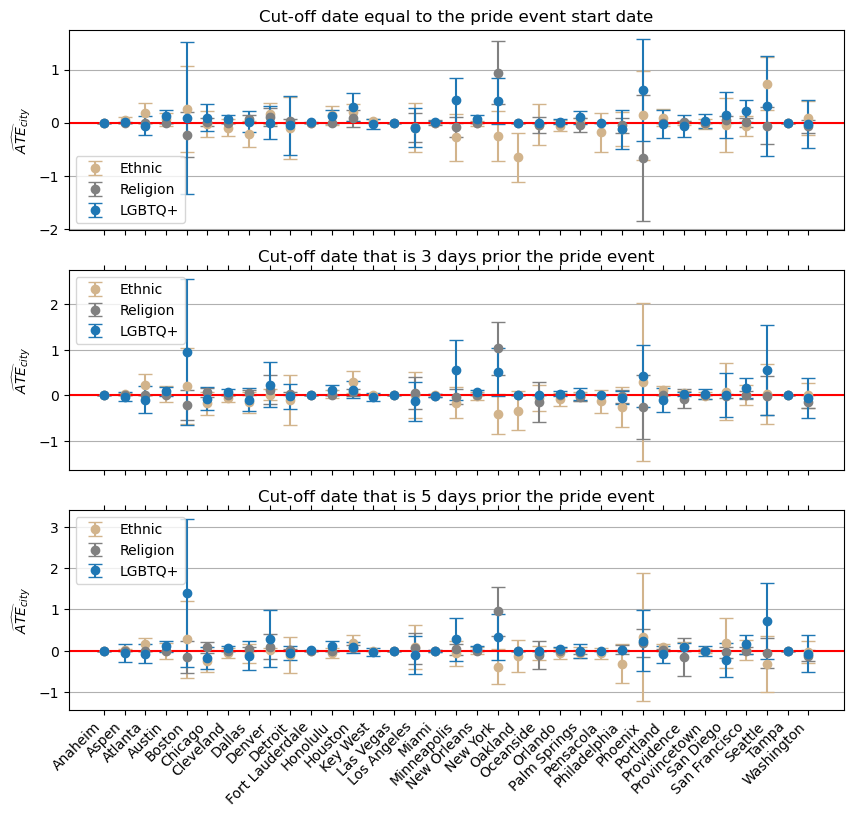

In [5]:
fig = plt.figure(figsize=(10,10))

plt.subplot(3,1,1)

plt.errorbar(lates_cityagg_14_a0.index.values, lates_cityagg_14_a0["late_ethno"],
             yerr=(lates_cityagg_14_a0["late_ethno"] - lates_cityagg_14_a0["late_cil_ethno"]).values,
             marker='o', label='Ethnic', capsize=5, linestyle='none', color='tan')
plt.errorbar(lates_cityagg_14_a0.index.values, lates_cityagg_14_a0["late_relig"],
             yerr=(lates_cityagg_14_a0["late_relig"] - lates_cityagg_14_a0["late_cil_relig"]).values,
             marker='o', label='Religion', capsize=5, linestyle='none', color='gray')
plt.errorbar(lates_cityagg_14_a0.index.values, lates_cityagg_14_a0["late"],
             yerr=(lates_cityagg_14_a0["late"] - lates_cityagg_14_a0["late_cil"]).values,
             marker='o', label='LGBTQ+', capsize=5, linestyle='none')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='lower left')
plt.ylabel('$\widehat{ATE}_{city}$')
plt.title('Cut-off date equal to the pride event start date')
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
plt.grid(which='major', axis='y')
plt.subplot(3,1,2)


plt.errorbar(lates_cityagg_14_a3.index.values, lates_cityagg_14_a3["late_ethno"],
             yerr=(lates_cityagg_14_a3["late_ethno"] - lates_cityagg_14_a3["late_cil_ethno"]).values,
             marker='o', label='Ethnic', capsize=5, linestyle='none', color='tan')
plt.errorbar(lates_cityagg_14_a3.index.values, lates_cityagg_14_a3["late_relig"],
             yerr=(lates_cityagg_14_a3["late_relig"] - lates_cityagg_14_a3["late_cil_relig"]).values,
             marker='o', label='Religion', capsize=5, linestyle='none', color='gray')
plt.errorbar(lates_cityagg_14_a3.index.values, lates_cityagg_14_a3["late"],
             yerr=(lates_cityagg_14_a3["late"] - lates_cityagg_14_a3["late_cil"]).values,
             marker='o', label='LGBTQ+', capsize=5, linestyle='none')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='upper left')
plt.ylabel('$\widehat{ATE}_{city}$')
plt.title('Cut-off date that is 3 days prior the pride event')
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
plt.grid(which='major', axis='y')

plt.subplot(3,1,3)

plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
plt.errorbar(lates_cityagg_14_a5.index.values, lates_cityagg_14_a5["late_ethno"],
             yerr=(lates_cityagg_14_a5["late_ethno"] - lates_cityagg_14_a5["late_cil_ethno"]).values,
             marker='o', label='Ethnic', capsize=5, linestyle='none', color='tan')
plt.errorbar(lates_cityagg_14_a5.index.values, lates_cityagg_14_a5["late_relig"],
             yerr=(lates_cityagg_14_a5["late_relig"] - lates_cityagg_14_a5["late_cil_relig"]).values,
             marker='o', label='Religion', capsize=5, linestyle='none', color='gray')
plt.errorbar(lates_cityagg_14_a5.index.values, lates_cityagg_14_a5["late"],
             yerr=(lates_cityagg_14_a5["late"] - lates_cityagg_14_a5["late_cil"]).values,
             marker='o', label='LGBTQ+', capsize=5, linestyle='none')
plt.axhline(y=0, color='r', linestyle='-')
fig.autofmt_xdate(rotation=45)
plt.legend(loc='upper left')
plt.grid(which='major', axis='y')

plt.ylabel('$\widehat{ATE}_{city}$')
plt.title('Cut-off date that is 5 days prior the pride event')

plt.savefig(os.path.join(graphs_path, 'percity_RD14_a0a3a5.png'), bbox_inches="tight")

## Different Cutoff Dates Comparions for 14-days, 10-days, abd 5-dats RD Period

Text(0, 0.5, '$\\widehat{ATE}_{city}$')

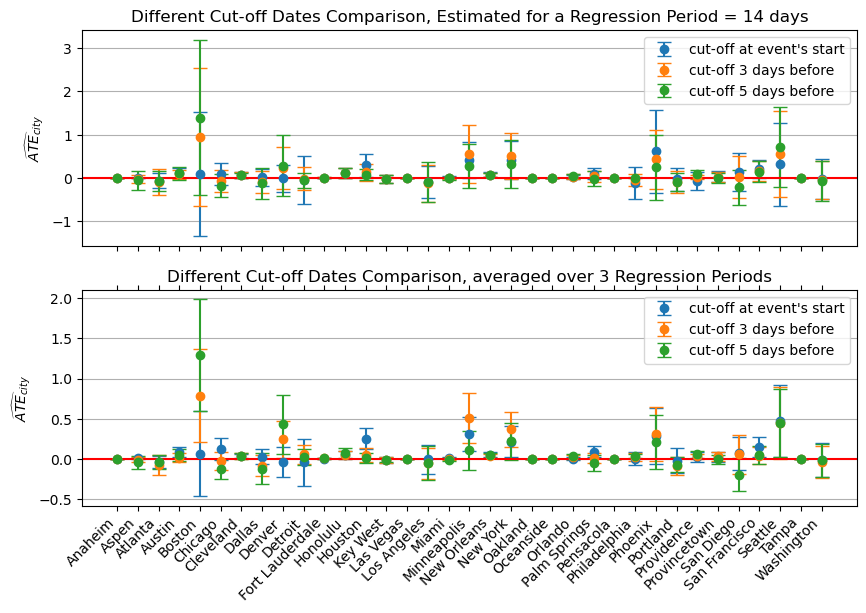

In [6]:
fig = plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.errorbar(lates_cityagg_14_a0.index.values, lates_cityagg_14_a0["late"],
             yerr=(lates_cityagg_14_a0["late"] - lates_cityagg_14_a0["late_cil"]).values,
             marker='o', label='cut-off at event\'s start', capsize=5, linestyle='none')

plt.errorbar(lates_cityagg_14_a3.index.values, lates_cityagg_14_a3["late"],
             yerr=(lates_cityagg_14_a3["late"] - lates_cityagg_14_a3["late_cil"]).values,
             marker='o', label='cut-off 3 days before', capsize=5, linestyle='none')

plt.errorbar(lates_cityagg_14_a5.index.values, lates_cityagg_14_a5["late"],
             yerr=(lates_cityagg_14_a5["late"] - lates_cityagg_14_a5["late_cil"]).values,
             marker='o', label='cut-off 5 days before', capsize=5, linestyle='none')


plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='upper right')
plt.ylabel('$\widehat{ATE}_{city}$')
plt.title('Different Cut-off Dates Comparison, Estimated for a Regression Period = 14 days')
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
plt.grid(which='major', axis='y')

plt.subplot(2,1,2)

plt.errorbar(lates_city_agg_avg_a0.index.values, lates_city_agg_avg_a0["late"],
             yerr=(lates_city_agg_avg_a0["late"] - lates_city_agg_avg_a0["late_cil"]).values,
             marker='o', label='cut-off at event\'s start', capsize=5, linestyle='none')

plt.errorbar(lates_city_agg_avg_a3.index.values, lates_city_agg_avg_a3["late"],
             yerr=(lates_city_agg_avg_a3["late"] - lates_city_agg_avg_a3["late_cil"]).values,
             marker='o', label='cut-off 3 days before', capsize=5, linestyle='none')

plt.errorbar(lates_city_agg_avg_a5.index.values, lates_city_agg_avg_a5["late"],
             yerr=(lates_city_agg_avg_a5["late"] - lates_city_agg_avg_a5["late_cil"]).values,
             marker='o', label='cut-off 5 days before', capsize=5, linestyle='none')
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
plt.title('Different Cut-off Dates Comparison, averaged over 3 Regression Periods')
plt.grid(which='major', axis='y')

plt.axhline(y=0, color='r', linestyle='-')
fig.autofmt_xdate(rotation=45)
plt.legend()
plt.ylabel('$\widehat{ATE}_{city}$')
plt.savefig(os.path.join(graphs_path, 'percity_d14andRDavg.png'), bbox_inches="tight")

## Complete ATE calculation

Text(0, 0.5, '$\\widehat{ATE}_{city}$')

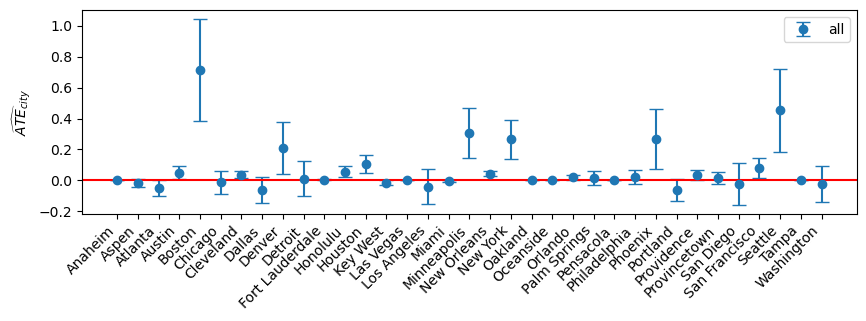

In [7]:
fig = plt.figure(figsize=(10,3))
plt.errorbar(lates_city_agg_avg_all.index.values, lates_city_agg_avg_all["late"],
             yerr=(lates_city_agg_avg_all["late"] - lates_city_agg_avg_all["late_cil"]).values,
             marker='o', label='all', capsize=5, linestyle='none')

plt.axhline(y=0, color='r', linestyle='-')
fig.autofmt_xdate(rotation=45)
plt.legend()
plt.ylabel('$\widehat{ATE}_{city}$')
plt.savefig(os.path.join(graphs_path, 'percity.png'), bbox_inches="tight")

## Different Cutoff Dates Comparions for 14-days RD Period, Including Similar Cities Comparison

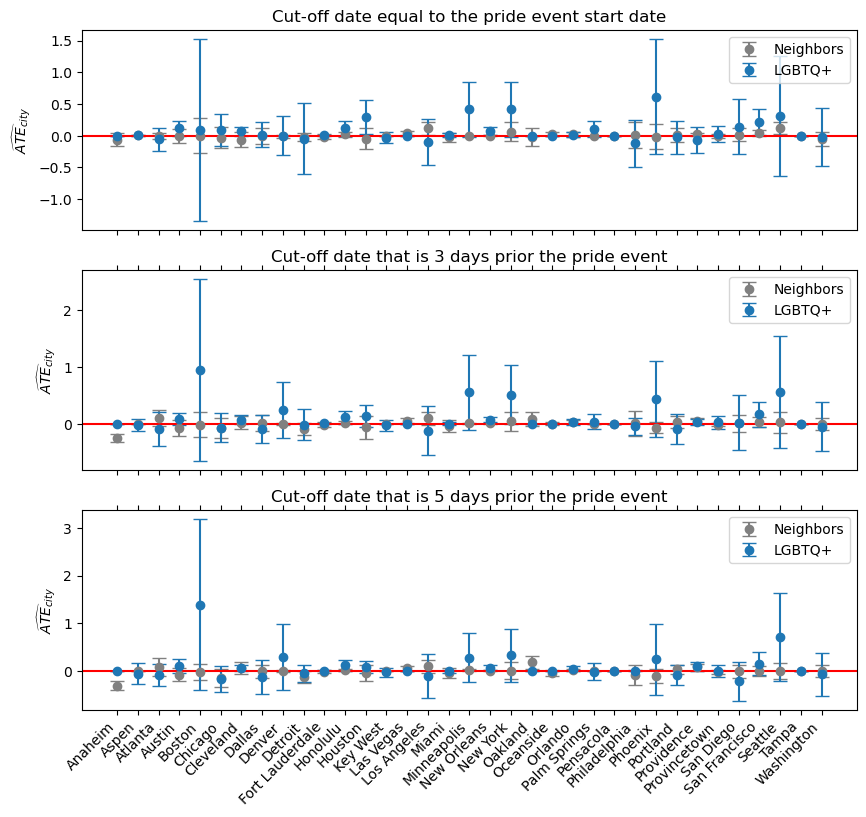

In [8]:
fig = plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.errorbar(lates_cityagg_14_a0_nn.index.values, lates_cityagg_14_a0_nn["late_neigh"],
             yerr=(lates_cityagg_14_a0_nn["late_neigh"] - lates_cityagg_14_a0_nn["late_cil_neigh"]).values,
             marker='o', label='Neighbors', capsize=5, linestyle='none', color='gray')
plt.errorbar(lates_cityagg_14_a0_nn.index.values, lates_cityagg_14_a0_nn["late"],
             yerr=(lates_cityagg_14_a0_nn["late"] - lates_cityagg_14_a0_nn["late_cil"]).values,
             marker='o', label='LGBTQ+', capsize=5, linestyle='none')
plt.axhline(y=0, color='r', linestyle='-')
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
plt.title('Cut-off date equal to the pride event start date')
plt.legend(loc='upper right')
plt.ylabel('$\widehat{ATE}_{city}$')

plt.subplot(3,1,2)
plt.errorbar(lates_cityagg_14_a3_nn.index.values, lates_cityagg_14_a3_nn["late_neigh"],
             yerr=(lates_cityagg_14_a3_nn["late_neigh"] - lates_cityagg_14_a3_nn["late_cil_neigh"]).values,
             marker='o', label='Neighbors', capsize=5, linestyle='none', color='gray')
plt.errorbar(lates_cityagg_14_a3_nn.index.values, lates_cityagg_14_a3_nn["late"],
             yerr=(lates_cityagg_14_a3_nn["late"] - lates_cityagg_14_a3_nn["late_cil"]).values,
             marker='o', label='LGBTQ+', capsize=5, linestyle='none')
plt.axhline(y=0, color='r', linestyle='-')
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
plt.title('Cut-off date that is 3 days prior the pride event')

plt.legend(loc='upper right')
plt.ylabel('$\widehat{ATE}_{city}$')

plt.subplot(3,1,3)

plt.errorbar(lates_cityagg_14_a5_nn.index.values, lates_cityagg_14_a5_nn["late_neigh"],
             yerr=(lates_cityagg_14_a5_nn["late_neigh"] - lates_cityagg_14_a5_nn["late_cil_neigh"]).values,
             marker='o', label='Neighbors', capsize=5, linestyle='none', color='gray')
plt.errorbar(lates_cityagg_14_a5.index.values, lates_cityagg_14_a5["late"],
             yerr=(lates_cityagg_14_a5["late"] - lates_cityagg_14_a5["late_cil"]).values,
             marker='o', label='LGBTQ+', capsize=5, linestyle='none')
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)

plt.axhline(y=0, color='r', linestyle='-')
fig.autofmt_xdate(rotation=45)
plt.title('Cut-off date that is 5 days prior the pride event')

plt.legend(loc='upper right')
plt.ylabel('$\widehat{ATE}_{city}$')
plt.savefig(os.path.join(graphs_path, 'percity_RD14_a0a3a5_nn.png'), bbox_inches="tight")
plt.savefig(os.path.join(graphs_path, 'percity_RD14_a5_nn.png'), bbox_inches="tight")

# ATEs Table


In [9]:
lates_city_agg_avg_all[["late", "late_cil", "late_cih", "late_pval_mean"]].round(decimals=4)

,late,late_cil,late_cih,late_pval_mean
city,,,,
Anaheim,0.0000,0.0000,0.0000,0.0000
Aspen,-0.0159,-0.0425,-0.0020,0.0086
Atlanta,-0.0530,-0.1046,-0.0240,0.0209
Austin,0.0488,0.0077,0.1026,0.1023
Boston,0.7135,0.3836,1.0074,0.1629
Chicago,-0.0128,-0.0875,0.0648,0.2023
Cleveland,0.0369,0.0130,0.0721,0.0323
Dallas,-0.0623,-0.1470,0.0140,0.1893
Denver,0.2122,0.0438,0.4027,0.2553


In [10]:
all_db = pd.concat([lates_agg_5_a0, lates_agg_10_a0, lates_agg_14_a0,
                    lates_agg_5_a3, lates_agg_10_a3, lates_agg_14_a3,
                    lates_agg_5_a5, lates_agg_10_a5, lates_agg_14_a5])
all_mean = all_db['late'].mean()
all_late = bootstrap((all_db["late"].values,), np.mean, confidence_level=0.95, random_state=1)
all_cilh = (all_late.confidence_interval.low, all_late.confidence_interval.high)
all_late_pval = combine_pvalues(all_db["late_pval"].values)[1]
all_late_pval_mean = all_db['late_pval'].mean()

print(f'Total:\nLATE: {all_mean:.3f} in [{all_cilh[0]:.3f}, {all_cilh[1]:.3f}], '
      f'pval fischer:{all_late_pval:.4f}, pval mean: {all_late_pval_mean:.3f}')
# lates_city_agg_avg_all[["late", "late_cil", "late_cih", "late_pval"]].round(decimals=3).mean()

Total:
LATE: 0.052 in [0.034, 0.071], pval fischer:0.0000, pval mean: 0.113


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))
